Fitted parameters: [2.54569135e+00 6.06204555e+00 2.51578871e-23]


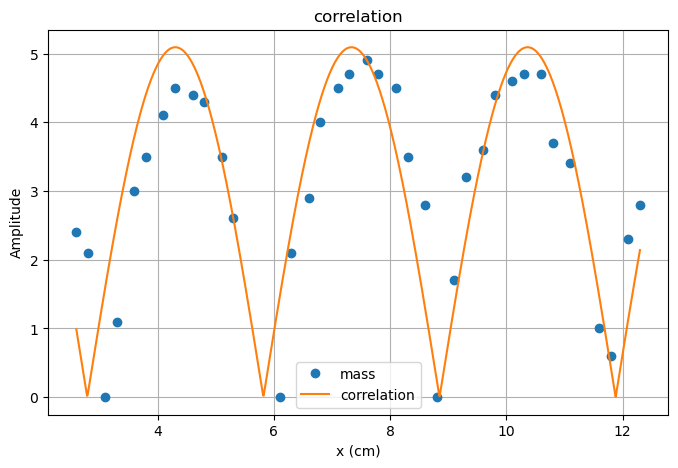

Errors: [0.10123984 0.07097891 0.19340981]


In [160]:
import numpy as np # math functions
import scipy # scientific functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
import pandas as pd # handling data structures (loaded from files)
from scipy.stats import linregress # contains linregress (for linear regression)
from scipy.optimize import curve_fit as cfit # non-linear curve fitting
from sklearn.metrics import r2_score # import function that calculates R^2 score
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = pd.read_csv('2_buzzers_data.csv')

x = data['x_1 (cm)'].to_numpy()
y = data['Amplitude'].to_numpy()

# 3. פונקציית ההתאמה לפי המודל התיאורטי
def f(x, a, lam, phi):
    return 2*a* abs(np.cos(((math.pi)/lam)*(2*x-a)+phi/2))

# 4. Curve fitting
p0 = [4, 5, 1.5]  # Initial guess: a=3, λ=2cm, φ=0
bounds = ([0.5,0.1, 0], [5, 20, 2* np.pi]) # Logical bounds: a in [0, 10], λ in [0.1, 10], φ in [0, 2π]


params, cov = curve_fit(f, x, y, p0=p0, bounds=bounds)

a_fit, lam_fit, phi_fit = params
print("Fitted parameters:", params)

# 5. חישוב R²

y_pred = f(x, *params)
Rsq = r2_score(y ,y_pred)


# 6. גרף נתונים + התאמה
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = f(x_fit, *params)

plt.figure(figsize=(8,5))
plt.plot(x, y, 'o', label='mass')
plt.plot(x_fit, y_fit, '-', label='correlation')
plt.xlabel('x (cm)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('correlation(therery vs massurments')
plt.grid()
plt.show()

# 7. שגיאת הפרמטרים (סטיית תקן)
errors = np.sqrt(np.diag(cov))
print("Errors:", errors)
